# Homework 03 - Python introduction

### Exercise 1 - Terminology

Describe the following terms with your own words:

***Function:*** is a block of code that is used to perform a specific task; a function is defined using 'def'; there are functions provided by Python but you can also create your own functions

***Variable:*** is a place where you can store a value; you can assign any information to a variable 

***Calling a function:*** using the function, that you already defined, again with the same or a different input within the brackets 

***String:*** is a sequence of characters (characters include anything you can type on a keyboard); you declare a string with quotes (single, double or triple) 

### Exercise 2 - spurious correlations

Reproduce a *spurious correlations* plot using `plt.plot()`.

Plot the time series `sociology_doctorates` and `space_launches` on a relative scale, i.e. as percentage of the last data point (i.e. years on the x-axis, relative data on the y-axis, the last data point in both time series should be 100%). Add a second plot which displays the relation between both data sets as scatter plot by using `plt.plot(dataset1, dataset2, 'o')` (data set 1 on x-axis, data set 2 on y-axis absolute units, not percentage).

Instead using the given time series, you can also use any other spurious correlation, if you want to search a different dataset.

Analyze both plots, come up with a wrong conclusion and explain why it is wrong.

Don't forget to label the axis!

![Spurious correlations](spurious-correlations.svg)

Source: https://www.tylervigen.com/spurious-correlations

In [3]:
sociology_doctorates = [601, 579, 572, 617, 566, 547, 597, 580, 536, 579, 576, 601, 664]
space_launches = [54, 46, 42, 50, 43, 41, 46, 39, 37, 45, 45, 41, 54]
years = list(range(1997, 2009 + 1))

In [14]:
relative_change_sociology = [None] * len(sociology_doctorates)
relative_change_space = [None] * len(sociology_doctorates)
for i in range (len(sociology_doctorates)):
    relative_change_sociology[i]=(sociology_doctorates[i] / sociology_doctorates[-1])*100
    relative_change_space[i]=(space_launches[i] / space_launches[-1])*100
print (relative_change_sociology)

[90.51204819277109, 87.19879518072288, 86.14457831325302, 92.92168674698796, 85.2409638554217, 82.37951807228916, 89.90963855421687, 87.34939759036145, 80.72289156626506, 87.19879518072288, 86.74698795180723, 90.51204819277109, 100.0]


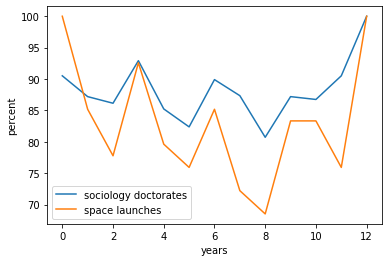

In [15]:
import matplotlib.pyplot as plt

plt.plot(relative_change_sociology, label = 'sociology doctorates')
plt.plot(relative_change_space, label = 'space launches')

plt.xlabel('years')
plt.ylabel('percent')

plt.legend()
plt.show()

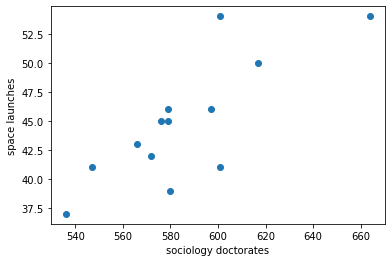

In [23]:
plt.plot(sociology_doctorates, space_launches, 'o')

plt.xlabel('sociology doctorates')
plt.ylabel('space launches')

#plt.legend()
plt.show()

In [ ]:
# Wrong conclusion: The more space launches there are, the more sociology doctorates get awarded.

### Exercise 3 - Flatten the curve

Use the logistic growth model to plot an oversimplified version of the [#flattenthecurve](https://www.biospace.com/getasset/fc2b8ad6-697f-49d5-827e-50f4901baf53/) [graphs](https://evilspeculator.com/wp-content/uploads/2020/03/flattenthecurve.jpg).

Write a function `new_infections(t, k)` which returns the number of new infections given by the following formula:

$i_{\textrm{new}}(t):=\frac{e^\left(-k \cdot P \cdot t\right) \cdot k \cdot P^2 \cdot \left(-1 + \frac{P}{i_0}\right)}{\left(1 + e^\left(-k \cdot P \cdot t \right) \cdot \left(-1 + \frac{P}{i_0}\right) \right)^2}$

Plot the number of infections for $t=0,\ldots,250$, $P=1\,000\,000$, $i_0=1$ and $k= \frac{3}{P \cdot 10}$.

Also add a horizontal line and label it with "healthcare system capacity".

Then analyze the plot for different values of $k$ and explain in detail why one should not use this model/plot to predict the outcome of an epidemic.

Bonus question: Is there something one can still learn from it?

##### Motivation

The motivation is not important for the programming task. There is no need to understand all details in order to do the exercise.

For a fixed population with $P$ individuals, $i(t)$ is the number of infections at time $t$. We assume that every individual stays infectious once infected. 

Choosing a random pair of individuals from the population, a new infection will take place with probability $2 \cdot \frac{i(t)}{P} \cdot \frac{P - i(t)}{P}$. If we assume that every infected individual will meet approximately $c$ others in every time step (and infect them if they are not yet infected), there is a total number of contacts $\frac{c \cdot P}{2}$ in every time step. That means we expect a total number of new infections:

$i_{\textrm{new}}(t) = \frac{c \cdot P}{2} \cdot 2 \cdot \frac{i(t)}{P} \cdot \frac{P - i(t)}{P} = \underbrace{\frac{c}{P}}_{=:k} \cdot \left(i(t) \cdot \left(P - i(t)\right) \right)$

This leads to the differential equation:

$i'(t) = i_{\textrm{new}}(t) = k \cdot \left(i(t) \cdot \left(P - i(t)\right) \right)$

A solution is given by:

$i(t) = \frac{P}{\left(1 + e^\left(-k \cdot P \cdot t \right) \cdot \left(\frac{P}{i_0} - 1\right)\right)}$

Differentiating $i(t)$ gives the number of new infections:

$i_{\textrm{new}}(t):=i'(t) = \frac{e^\left(-k \cdot P \cdot t\right) \cdot k \cdot P^2 \cdot \left(-1 + \frac{P}{i_0}\right)}{\left(1 + e^\left(-k \cdot P \cdot t \right) \cdot \left(-1 + \frac{P}{i_0}\right) \right)^2}$


[3blue1brown](https://www.youtube.com/watch?v=gxAaO2rsdIs) has a great video on the topic. If you are interested in a model which is a bit closer to the real world, but still quite simple, have a look at the [SIR model](https://www.youtube.com/watch?v=Qrp40ck3WpI). A large part of this is inspired by the [German Wikipiedia page](https://de.wikipedia.org/wiki/Logistische_Funktion).

##### Solution

Write your code here:

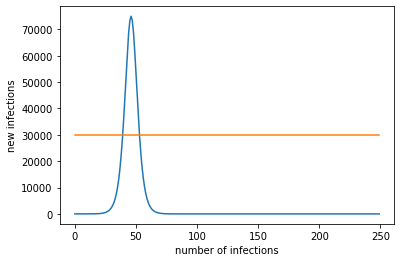

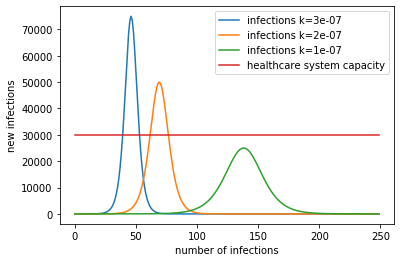

In [61]:
import math
from math import exp

P = 1000000
k = 3/(1000000*10)
t = list(range(0,250))

def new_infections (t,k):
    new_infections = ((exp(-k*P*t))*k*P**2*(-1+(P/1))) / ((1+(exp(-k*P*t))*(-1+(P/1)))**2)
    return new_infections

infections = [None] * len(t)
for i in range(len(t)):
    infections[i] = new_infections(i,k)
    
y = [30000] * len(t)
    
plt.plot(t,infections,label = 'new infections')
plt.plot(t,y, label = 'healthcare system capacity')

plt.xlabel('number of infections')
plt.ylabel('new infections')

#plt.legend()
plt.show()


k_list = [3/(1000000*10),2/(1000000*10),1/(1000000*10)]
for k in k_list:
    infections = [None] * len(t)
    for i in range(len(t)):
        infections[i] = new_infections(i,k)
        
    plt.plot(t,infections, label = 'infections k=' + str(k))
plt.plot(t,y, label = 'healthcare system capacity')
plt.xlabel('number of infections')
plt.ylabel('new infections')
plt.legend()
plt.show()

##### Bonus: Interactive plot

If you want an interactive widget to control the parameter c, you can use the following code.

**Warning:** After running `%matplotlib notebook` you cannot plot in other cells any longer. Restart the Jupyter kernel and refresh the browser window to disable again.

```Python
%matplotlib notebook
from ipywidgets import interact

line, = plt.plot(x, y)

# write here more plotting code (axis label etc)

def update(c=3.0/10.):
    line.set_ydata([new_infections(t, c  / P) for t in time_range])

interact(update);
```

### Exercise 4 - Fibonacci 

Write a function `fibonacci(n)` which calculates the n-th [Fibonacci number](https://en.wikipedia.org/wiki/Fibonacci_number), defined by $f(0)=0$, $f(1)=1$ and $f(n) = f(n-1)+f(n-2)$.

Use the function to calculate $f(100)$.

In [82]:
def fibonacci(n):
    f = [None] * (n+1)
    f[0] = 0
    f[1] = 1
    for i in range(2,n+1):
        f[i] = f[i-1]+f[i-2]
    return f[n]

print (fibonacci(100))

354224848179261915075
